In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
data.dropna(axis=0,inplace=True)

In [4]:
data.head()
data.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,22279.380104,2012.042771,6.513758,15.685514,11.502311,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866
std,12658.168415,1.415311,3.454199,8.785539,6.924848,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165
min,25.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,11464.000000,2011.000000,4.000000,8.000000,5.000000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,22435.000000,2012.000000,7.000000,16.000000,12.000000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,33262.000000,2013.000000,10.000000,23.000000,18.000000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000


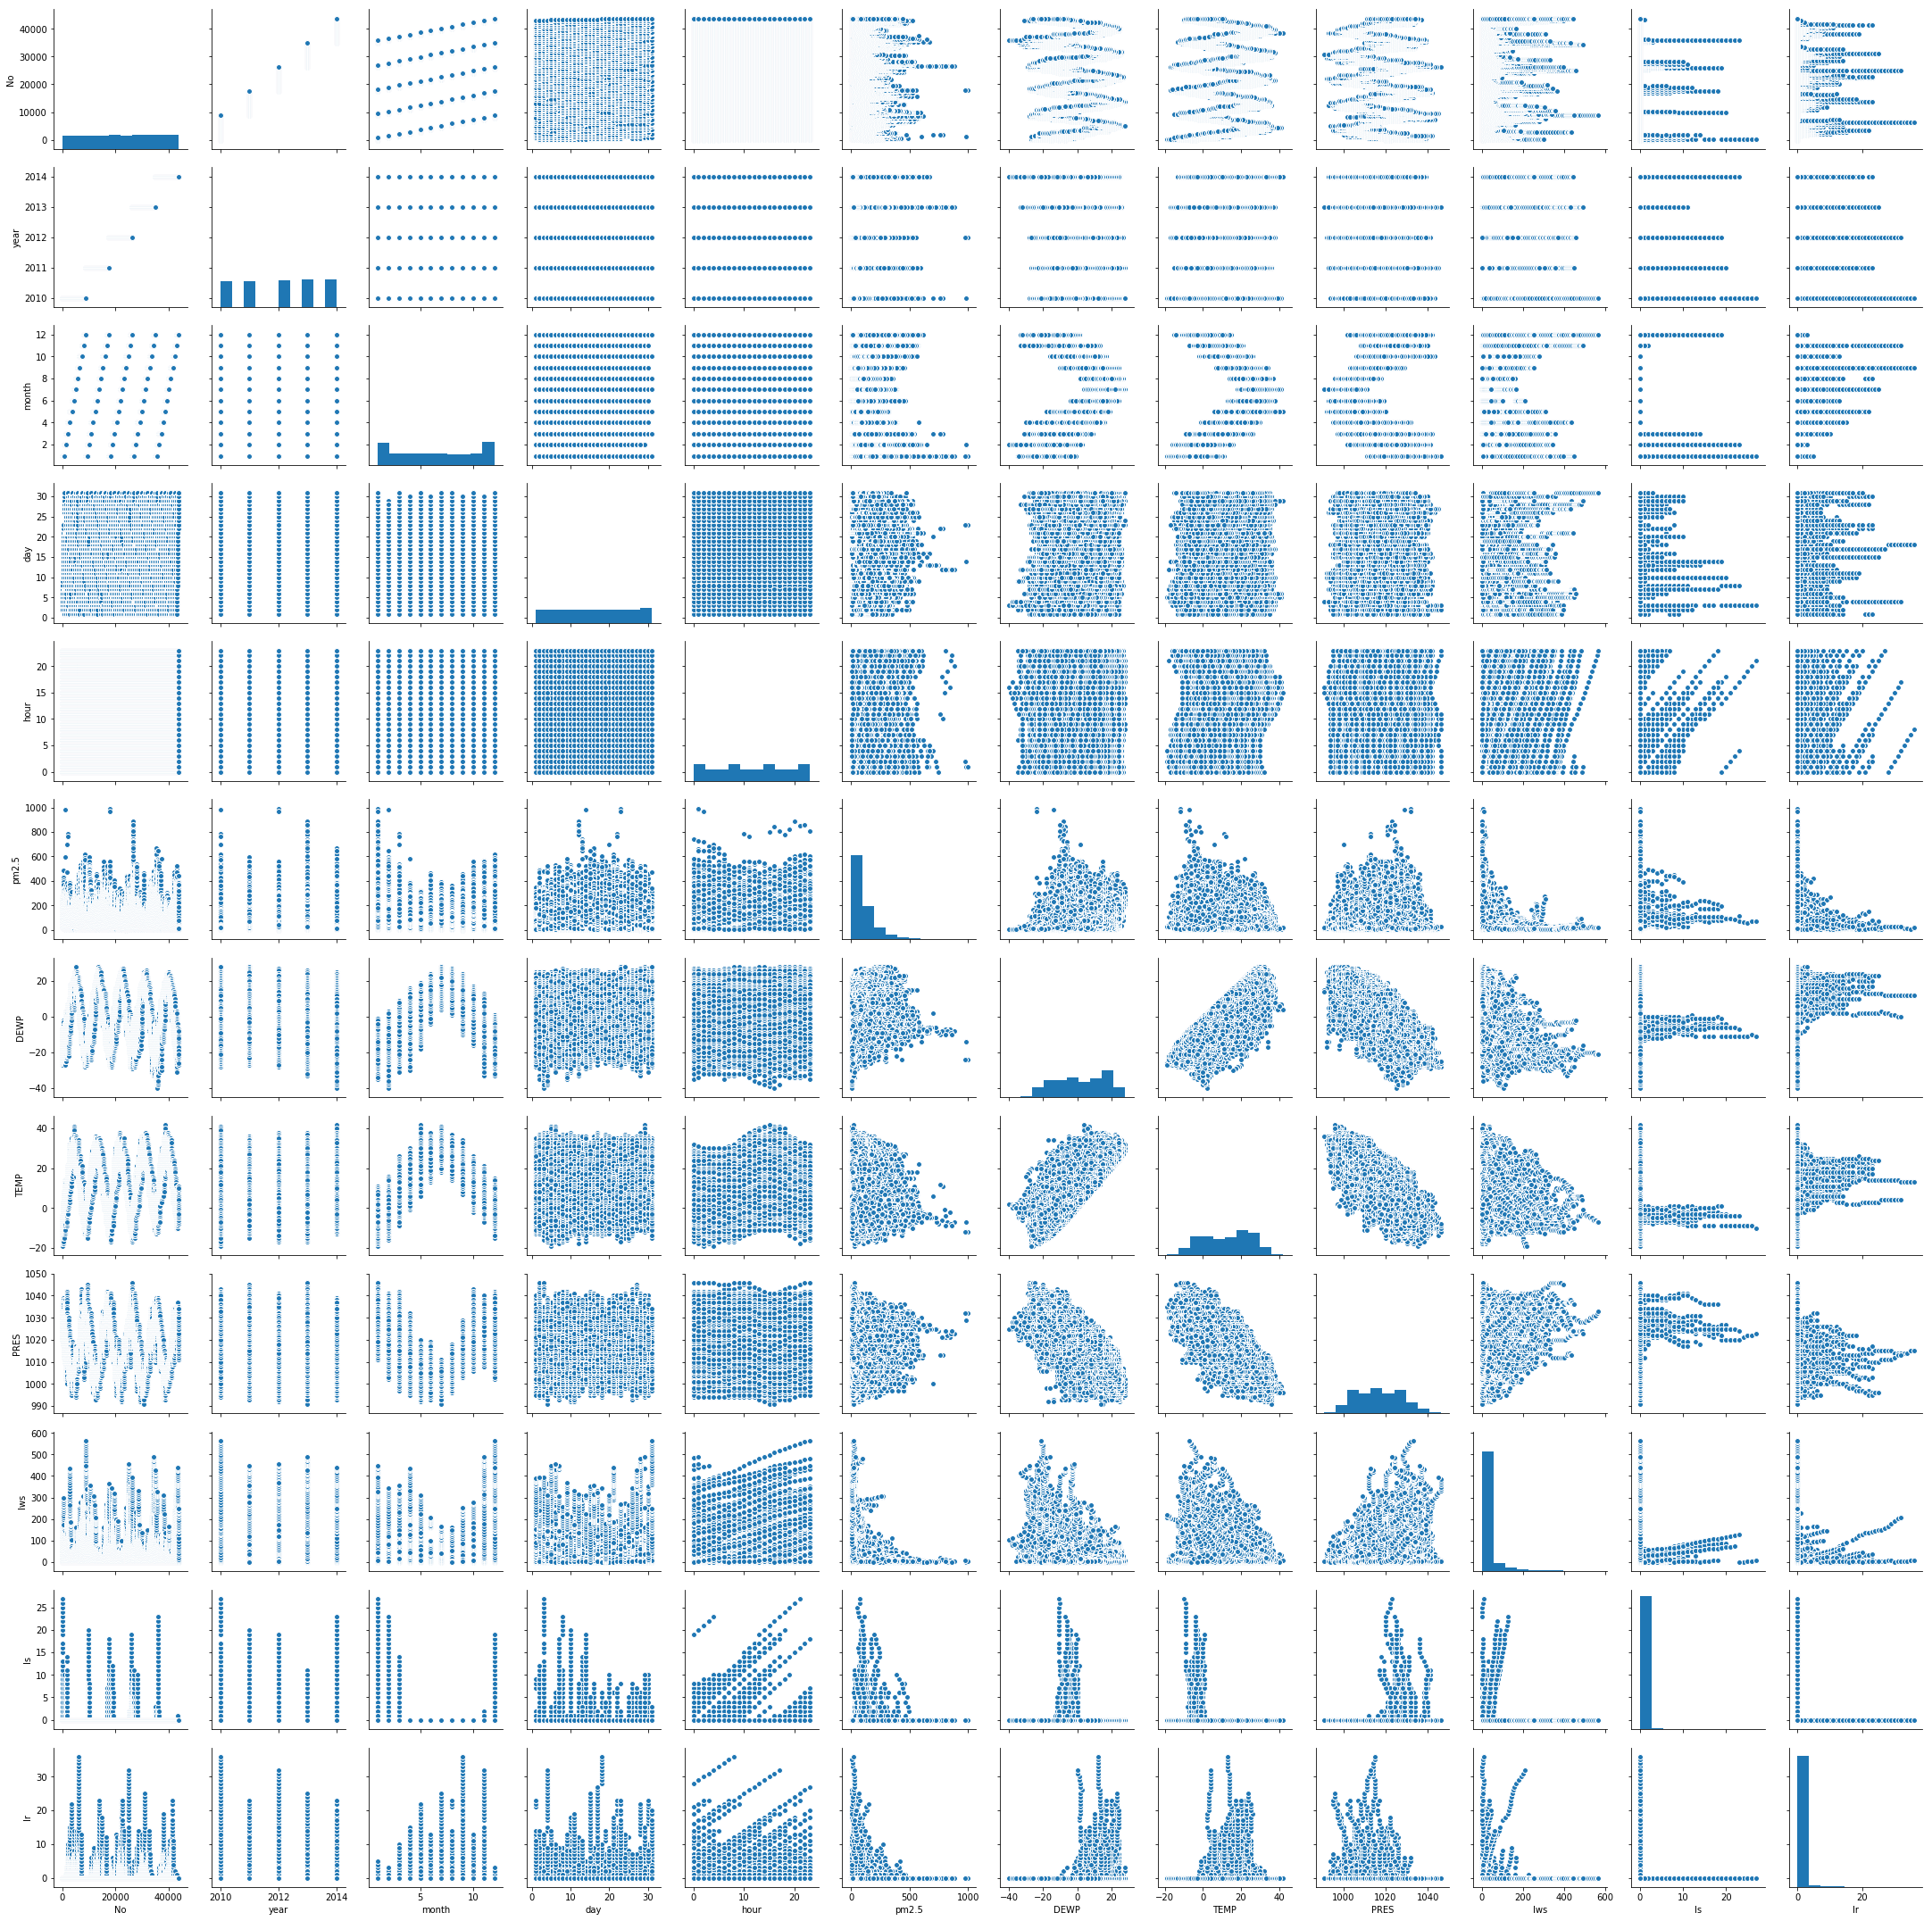

In [5]:

sns.pairplot(data)

In [6]:
def create_date(cols):
    year = cols[0]
    month = cols[1]
    day = cols[2]
    hour = cols[3]
    
    if month<10:
        month = "0" + str(month)
        
    if day<10:
        day = "0" + str(day)
        
    if hour<10:
        hour = "0" + str(hour)
    date = str(year) + "-" + str(month) +"-" + str(day) + " " + str(hour) + ":00:00"
    return date

create_date([2014,10,4,2])

'2014-10-04 02:00:00'

In [7]:
data['date'] = data[['year','month','day','hour']].apply(create_date, axis = 1)
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


In [8]:

def convert_to_kelvin(temp):
    kelvin = temp + 273
    return kelvin

data['TEMP'] = data['TEMP'].apply(convert_to_kelvin)
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date
24,25,2010,1,2,0,129.0,-16,269.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,26,2010,1,2,1,148.0,-15,269.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,27,2010,1,2,2,159.0,-11,268.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,28,2010,1,2,3,181.0,-7,268.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,29,2010,1,2,4,138.0,-7,268.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


In [9]:
df = data[['date','month','day','hour','pm2.5','TEMP','PRES']]

In [10]:
#sampling a small part of the data to find patterns

df1 = df.head(1000)

In [11]:
df1.describe()
pm_by_hour = df1['pm2.5'].groupby(df1['hour']).mean()

In [12]:
type(pm_by_hour)
pm_by_hour.head()

hour
0    108.571429
1    126.785714
2    100.317073
3    104.595238
4     82.761905
Name: pm2.5, dtype: float64

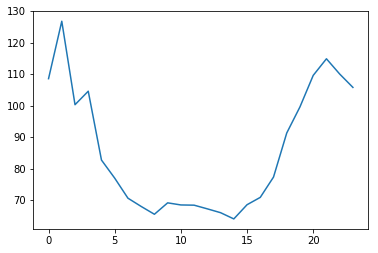

In [13]:
plt.plot(pm_by_hour)
plt.show()

In [14]:
df1.head()
df1['date'] = pd.to_datetime(df['date'])
df1.index = df1['date']
df1.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,month,day,hour,pm2.5,TEMP,PRES
date,,,,,,,
2010-01-02 00:00:00,2010-01-02 00:00:00,1,2,0,129.0,269.0,1020.0
2010-01-02 01:00:00,2010-01-02 01:00:00,1,2,1,148.0,269.0,1020.0
2010-01-02 02:00:00,2010-01-02 02:00:00,1,2,2,159.0,268.0,1021.0
2010-01-02 03:00:00,2010-01-02 03:00:00,1,2,3,181.0,268.0,1022.0
2010-01-02 04:00:00,2010-01-02 04:00:00,1,2,4,138.0,268.0,1022.0


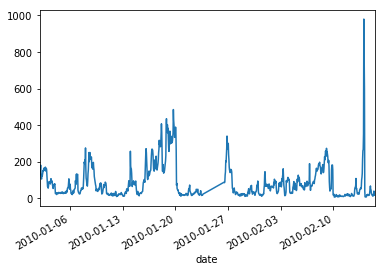

In [15]:

df1['pm2.5'].plot()

In [16]:
data.head()
data['date'] = pd.to_datetime(data['date'])
data.index = data['date']
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date
date,,,,,,,,,,,,,,
2010-01-02 00:00:00,25,2010,1,2,0,129.0,-16,269.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
2010-01-02 01:00:00,26,2010,1,2,1,148.0,-15,269.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
2010-01-02 02:00:00,27,2010,1,2,2,159.0,-11,268.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
2010-01-02 03:00:00,28,2010,1,2,3,181.0,-7,268.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
2010-01-02 04:00:00,29,2010,1,2,4,138.0,-7,268.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


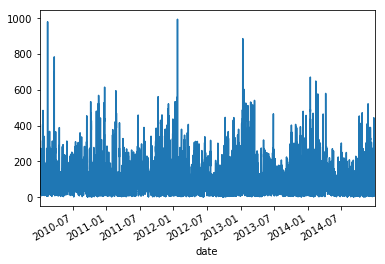

In [17]:
data['pm2.5'].plot()

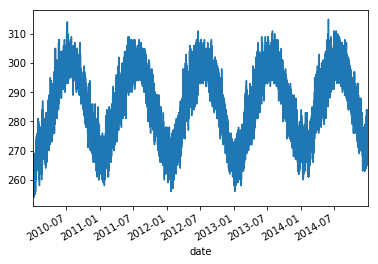

In [18]:
data['TEMP'].plot()

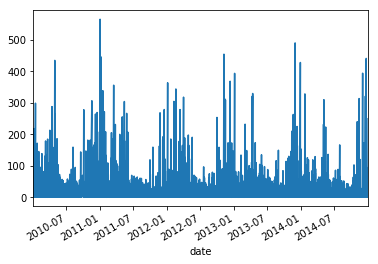

In [19]:

data['Iws'].plot()

In [20]:
data['Iws'].corr(data['pm2.5'])

-0.24778444916507997

In [21]:
data['Is'].corr(data['pm2.5'])

0.019265576051499506

In [22]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_actual = data[['pm2.5','DEWP','TEMP','PRES','Iws','Is','Ir']]
data_actual.head()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
date,,,,,,,
2010-01-02 00:00:00,129.0,-16,269.0,1020.0,1.79,0,0
2010-01-02 01:00:00,148.0,-15,269.0,1020.0,2.68,0,0
2010-01-02 02:00:00,159.0,-11,268.0,1021.0,3.57,0,0
2010-01-02 03:00:00,181.0,-7,268.0,1022.0,5.36,1,0
2010-01-02 04:00:00,138.0,-7,268.0,1022.0,6.25,2,0


In [23]:
scaler.fit(data_actual.drop('pm2.5',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
scaled_features = scaler.transform(data_actual.drop('pm2.5',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=data_actual.columns[:-1])
df_feat.head()

,pm2.5,DEWP,TEMP,PRES,Iws,Is
0,-1.229791,-1.347143,0.345329,-0.444944,-0.071057,-0.137408
1,-1.160508,-1.347143,0.345329,-0.427007,-0.071057,-0.137408
2,-0.883375,-1.429278,0.442411,-0.409069,-0.071057,-0.137408
3,-0.606241,-1.429278,0.539493,-0.372993,1.212862,-0.137408
4,-0.606241,-1.429278,0.539493,-0.355055,2.496781,-0.137408


In [25]:
df_feat.describe()

,pm2.5,DEWP,TEMP,PRES,Iws,Is
count,4.175700e+04,4.175700e+04,4.175700e+04,4.175700e+04,4.175700e+04,4.175700e+04
mean,-1.740552e-14,-1.858231e-15,-1.990154e-15,-4.782597e-16,-4.873900e-15,-6.087432e-15
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-2.892591e+00,-2.579169e+00,-2.470038e+00,-4.719510e-01,-7.105723e-02,-1.374084e-01
25%,-8.140912e-01,-8.543328e-01,-8.196501e-01,-4.449441e-01,-7.105723e-02,-1.374084e-01
50%,1.730880e-02,1.312878e-01,-4.299705e-02,-3.727913e-01,-7.105723e-02,-1.374084e-01
75%,9.179922e-01,8.705033e-01,8.307377e-01,-3.943711e-02,-7.105723e-02,-1.374084e-01
max,1.818676e+00,2.431069e+00,2.869452e+00,1.091610e+01,3.459476e+01,2.524780e+01


In [26]:

X = df_feat.drop('pm2.5', axis = 1)
X.head()

,DEWP,TEMP,PRES,Iws,Is
0,-1.347143,0.345329,-0.444944,-0.071057,-0.137408
1,-1.347143,0.345329,-0.427007,-0.071057,-0.137408
2,-1.429278,0.442411,-0.409069,-0.071057,-0.137408
3,-1.429278,0.539493,-0.372993,1.212862,-0.137408
4,-1.429278,0.539493,-0.355055,2.496781,-0.137408


In [27]:
y = df_feat['pm2.5']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

In [31]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.410865522702
MSE: 0.259427000784
RMSE: 0.50933976949


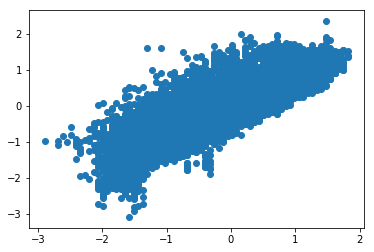

In [32]:
plt.scatter(y_test, predictions)